# Import Files, Libaries and Dataset

In [1]:
#upload files
from google.colab import files
uploaded = files.upload()

Saving Branch_Allocation_Final.csv to Branch_Allocation_Final.csv
Saving requirements.txt to requirements.txt


In [0]:
#downgrading colab 
!pip install -r "requirements.txt"

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('Branch_Allocation_Final.csv',error_bad_lines=False) 

In [5]:
df

,Rank,Nationality,10th,12th,Gender,Department
0,1595,India,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]"
1,11564,India,84,53,F,[Not Eligible]
2,4769,India,84,47,M,[Not Eligible]
3,7669,India,89,92,F,"[Civil,Mech,Electronics,Electrical]"
4,6479,India,76,90,F,"[Civil,Mech,Electronics,Electrical]"
...,...,...,...,...,...,...
595,13138,Nepal,87,57,M,[Not Eligible]
596,14925,Ethiopia,77,55,F,[Not Eligible]
597,3387,Ethiopia,93,83,M,"[CS,Civil,Mech,Electronics,Electrical]"
598,11544,Ethiopia,76,63,F,[Not Eligible]


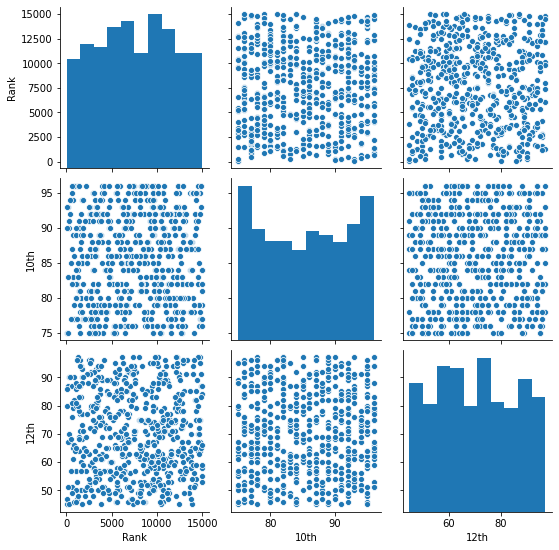

In [6]:
sns.pairplot(df)

In [7]:
df['Nationality'].unique()

array(['India', 'Ethiopia', 'Nepal'], dtype=object)

In [0]:
x=df.iloc[:,:5]

In [9]:
x

,Rank,Nationality,10th,12th,Gender
0,1595,India,85,94,F
1,11564,India,84,53,F
2,4769,India,84,47,M
3,7669,India,89,92,F
4,6479,India,76,90,F
...,...,...,...,...,...
595,13138,Nepal,87,57,M
596,14925,Ethiopia,77,55,F
597,3387,Ethiopia,93,83,M
598,11544,Ethiopia,76,63,F


In [0]:
y=df.iloc[:,-1]

In [11]:
type(y)

pandas.core.series.Series

# Data Preprocessing

In [12]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
x.iloc[:,-1]=l.fit_transform(x.iloc[:,-1])           #gender
y.iloc[:] = l.fit_transform(y.iloc[:])             #department    
x.iloc[:,1] = l.fit_transform(x.iloc[:,1])         #nationality

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
x

,Rank,Nationality,10th,12th,Gender
0,1595,1,85,94,0
1,11564,1,84,53,0
2,4769,1,84,47,1
3,7669,1,89,92,0
4,6479,1,76,90,0
...,...,...,...,...,...
595,13138,2,87,57,1
596,14925,0,77,55,0
597,3387,0,93,83,1
598,11544,0,76,63,0


In [14]:
y

0      0
1      5
2      5
3      3
4      3
      ..
595    5
596    5
597    0
598    5
599    5
Name: Department, Length: 600, dtype: int64

In [0]:
def change(row):
    if row['12th'] >= 65:
      return 1
    else:
      return 0

In [0]:
#adding admission column
x['Adm']=x.apply(change,axis=1)

In [17]:
x

,Rank,Nationality,10th,12th,Gender,Adm
0,1595,1,85,94,0,1
1,11564,1,84,53,0,0
2,4769,1,84,47,1,0
3,7669,1,89,92,0,1
4,6479,1,76,90,0,1
...,...,...,...,...,...,...
595,13138,2,87,57,1,0
596,14925,0,77,55,0,0
597,3387,0,93,83,1,1
598,11544,0,76,63,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

In [0]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.25, random_state = 0,shuffle=True)

In [20]:
from sklearn import utils
print(utils.multiclass.type_of_target(x_train.astype('int')))

multiclass-multioutput


# Classifier Testing for Best Results

Random Forest

In [21]:
#fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier as rfc
classifier = rfc(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[20,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0,  7,  1,  0,  0],
       [ 0,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 74]])

In [24]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9866666666666667
0.014740554623801774


Logistic Regression

In [25]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[18,  0,  0,  2,  0,  0],
       [ 0,  9,  2,  0,  0,  0],
       [ 0,  1,  2,  5,  0,  0],
       [ 2,  0,  1, 21,  0,  0],
       [ 0,  1,  0,  0, 12,  0],
       [ 2,  0,  0,  2,  0, 70]])

In [28]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8755555555555554
0.03744955454745049


SVM

In [29]:
#fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0,  3,  0,  0],
       [ 0,  8,  3,  0,  0,  0],
       [ 0,  1,  4,  3,  0,  0],
       [ 2,  0,  1, 21,  0,  0],
       [ 0,  0,  0,  0, 12,  1],
       [ 2,  0,  1,  2,  0, 69]])

In [32]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8644444444444443
0.04030746032714899


In [33]:
#fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[18,  0,  0,  2,  0,  0],
       [ 0,  8,  3,  0,  0,  0],
       [ 0,  0,  6,  2,  0,  0],
       [ 2,  0,  0, 22,  0,  0],
       [ 0,  2,  0,  0, 10,  1],
       [ 2,  0,  1,  2,  0, 69]])

In [36]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.928888888888889
0.019372884193514132


K-NN

In [37]:
from sklearn.neighbors import KNeighborsClassifier as knc
classifier=knc(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0,  6,  0,  0],
       [ 0,  7,  2,  0,  2,  0],
       [ 0,  1,  3,  4,  0,  0],
       [ 3,  0,  1, 20,  0,  0],
       [ 0,  2,  0,  1, 10,  0],
       [ 3,  0,  1,  1,  0, 69]])

In [40]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8044444444444444
0.05239922721134044


Decision Tree

In [41]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy' , random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

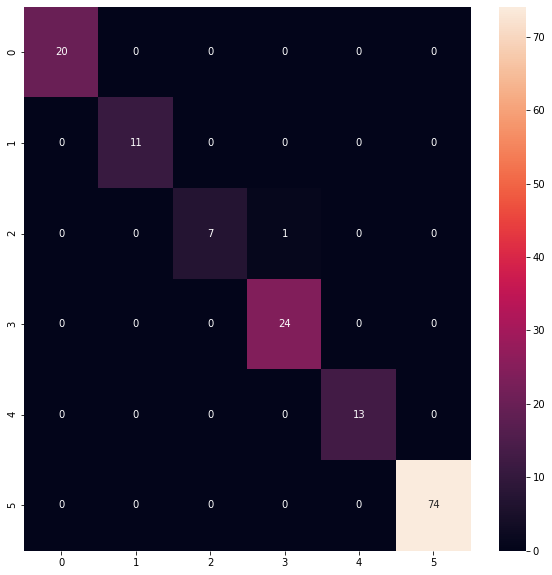

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

In [44]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9911111111111112
0.014740554623801772


Naive Bayes

In [45]:
#fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[20,  0,  0,  0,  0,  0],
       [ 0, 10,  1,  0,  0,  0],
       [ 0,  0,  7,  1,  0,  0],
       [ 0,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 2,  0,  1,  3,  0, 68]])

In [48]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9555555555555555
0.024343224778007367


Therefore Final Evaluation will be done with Decision Tree as its                 
Mean Accuracy = 0.9911111111111112                            
Mean Std. Dev = 0.014740554623801772, is highest amongst all the classifiers.

# Model Boosting

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [51]:
#applying grid search to find the best model and best parameters
from sklearn.model_selection import GridSearchCV as gsv
parameters = [{'splitter':['best','random'],'criterion':['entropy','gini'],'max_depth':['None',2,4,6]}]
grid_search=gsv(estimator=classifier,
                param_grid=parameters,
                scoring='accuracy',
                cv=10,
                n_jobs=1)
grid_search=grid_search.fit(x_train,y_train)
print('best_accuracy=',grid_search.best_score_)
print('best_parameters=',grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

best_accuracy= 0.9911111111111112
best_parameters= {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


Therefore, Best Parameters = {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [52]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy' ,random_state=0, splitter='best', max_depth=4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

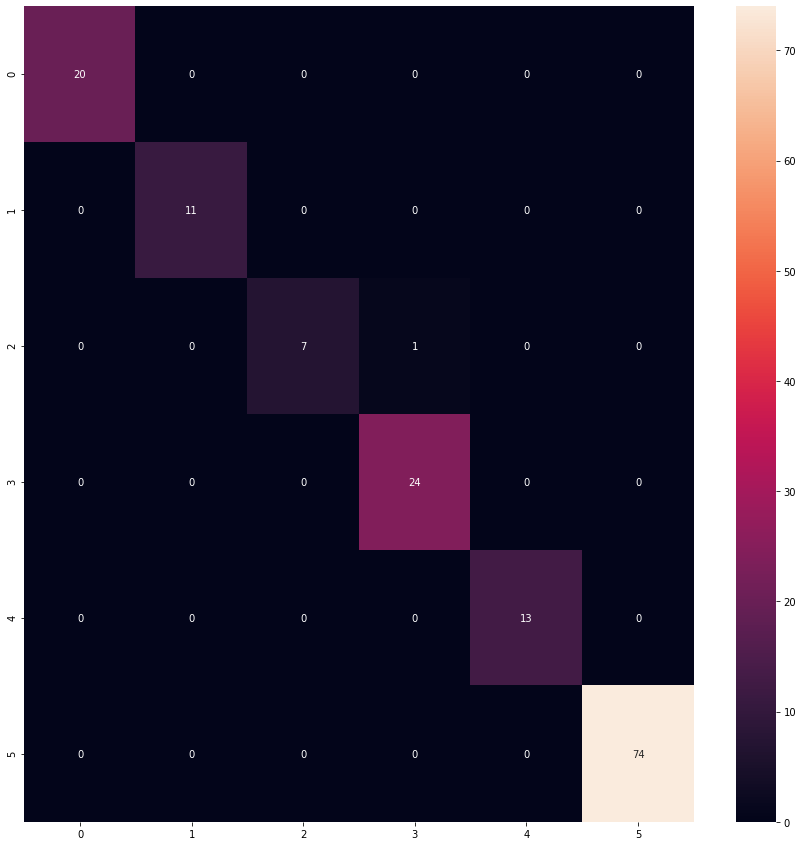

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot=True)

In [55]:
#observating classification report for performance evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      0.88      0.93         8
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        74

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



# End